## **ANÁLISIS DESCRIPTIVO Y EXPLORATORIO**

#### **TRAYENDO DATA**


In [225]:
import pandas as pd
import numpy as np

train=pd.read_csv("C:/Users/ugad.ingenieria2/Desktop/EsSalud/DATASETS/Iris.csv",sep=",")


In [226]:
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### ELIMINANDO NULOS Y 

In [228]:
train=train.dropna()

#### ONE HOT ENCODING

In [229]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Species'] = le.fit_transform(train['Species'].values)

In [230]:
train.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


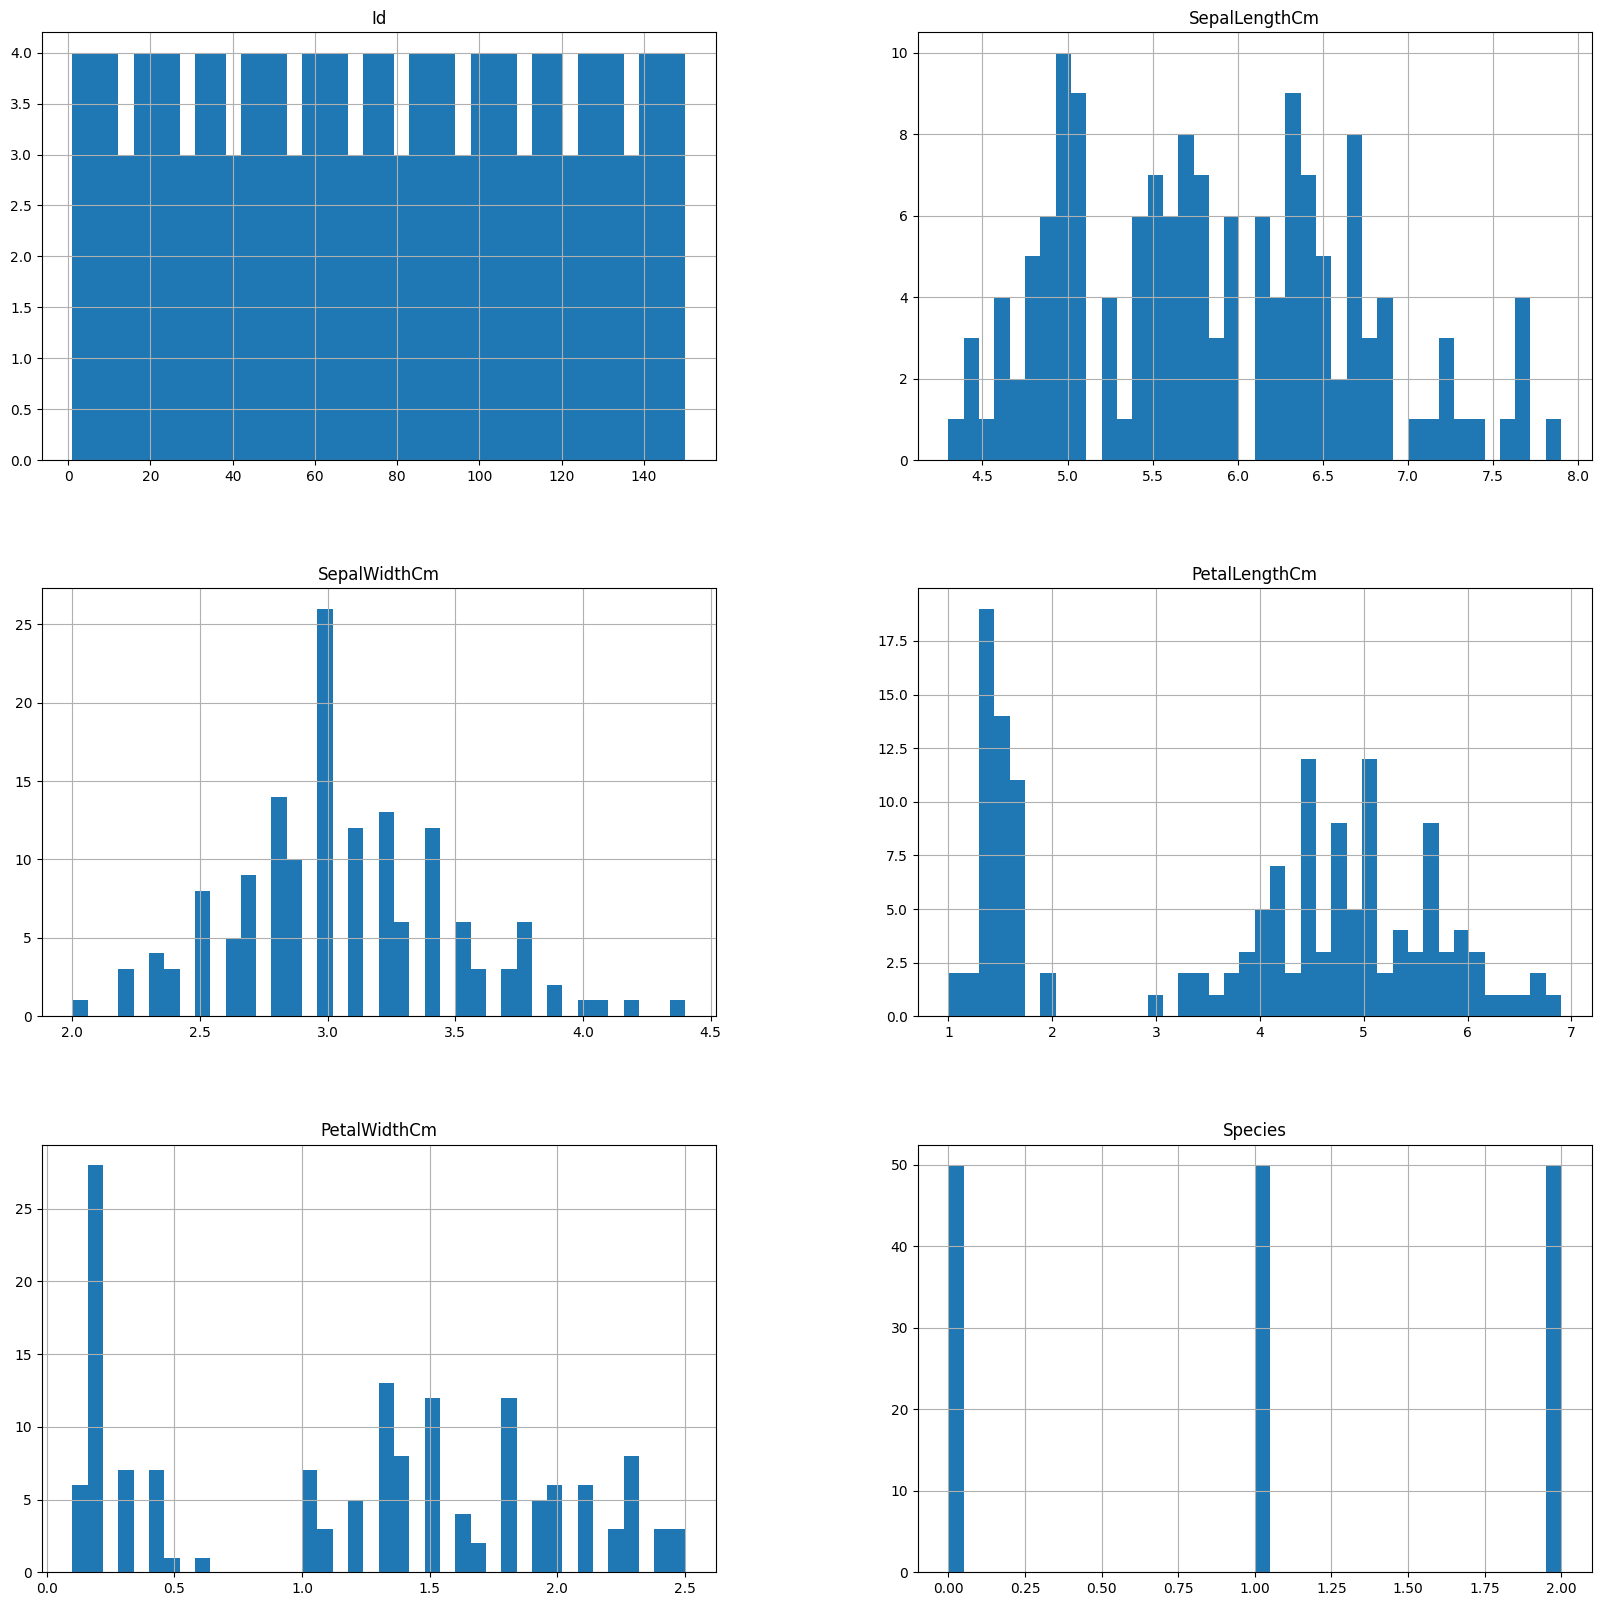

In [231]:
import matplotlib.pyplot as plt
train.hist(bins=40, figsize=(20,20))
plt.show()
#PODEMOS VER QUE LA GRÁFICA DEL PRECIO, TIENE UNA DISTRIBUCIÓN QUE DETALLAREMOS MÁS ADELANTE

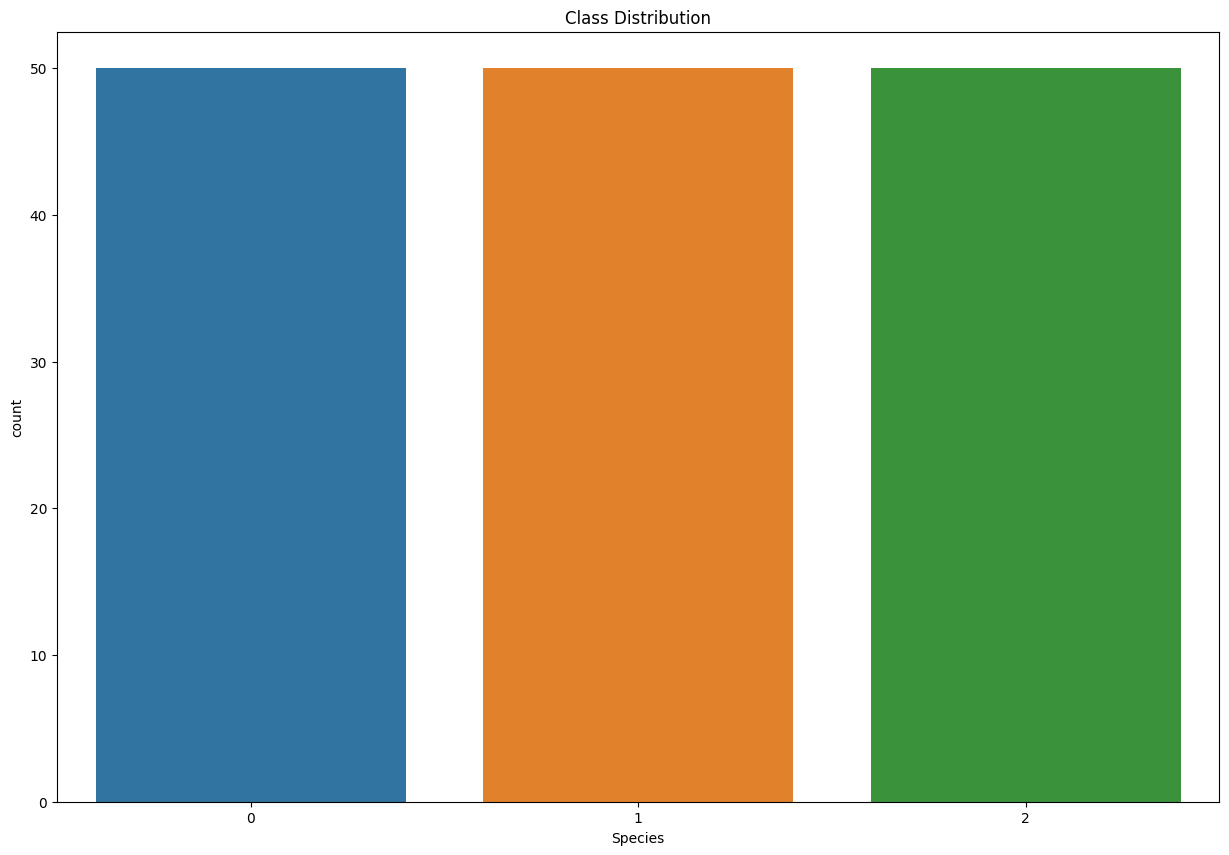

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Species",data=train)
ax.set_title("Class Distribution")
plt.show()



#GRAFICAREMOS A DETALLE LA GRAFICA DEL PRECIO PARA VER SU DISTRIBUCION Y QUE ES ASIMETRICA POSITIVA. 

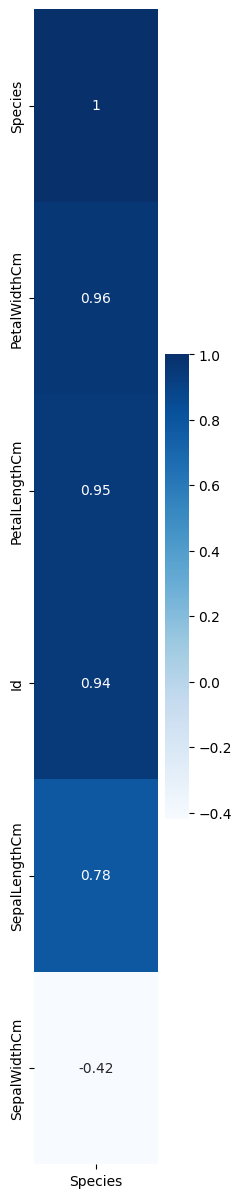

In [233]:

import seaborn as sns
correlacion = train
correlacion=correlacion.corr().round(2)
correlacion = correlacion.loc[:,["Species"]]
correlacion = correlacion.sort_values(by="Species", ascending=False)


fig, ax = plt.subplots(figsize=(2,15))

ax=sns.heatmap(correlacion, annot=True,cmap="Blues")

#EN ESTA GRAFICA VEREMOS LA CORRELACION DE LAS VARIABLES CON LA VARIABLE OBJETIVO. 

In [234]:
train.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### ESTABLECEMOS LAS VARIABLES

In [235]:
#ELIMINAMOS LAS VARIABLES QUE NO USAREMOS
train=train.drop("Id",axis=1)

#ESTABLECEMOS LA VARIABLE OBJETIVO Y LAS VARIABLES DEPENDIENTES
y=train["Species"]
X=train.drop("Species", axis=1)


## **ANÁLISIS DE SELECCIÓN DE CARACTERISTICAS**

#### **SELECCIONANDO VARIABLES POR CORRELACIÓN**

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#SE DESCARTA VARIABLES SP Y AÑO

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LogisticRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
ACC_CORRELA = np.sqrt(accuracy_score(y_test, y_pred))

print("ACURACCY DESPUES DE LA SELECCIÓN POR CORRELACIÓN: "+str(ACC_CORRELA))

ACURACCY DESPUES DE LA SELECCIÓN POR CORRELACIÓN: 1.0


#### **SELECCIONANDO VARIABLES CON RFE**

In [237]:

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# CREAMOS UN OBJETO DE REGRESIÓN LINEAL
modelo = LogisticRegression()

Lista_Accuracy = []
Posicion_Accuracy = []
elementos=len(X.columns)


#COMENZAREMOS A ITERAR PARA VER CON QUE CANTIDAD DE VARIABLES SE TIENE EL MEJOR ACCURACY
for i in range(elementos):
    # CREAMOS UN OBJETO RFE PARA SELECCIONAR n CARACTERÍSTICAS
    rfe = RFE(modelo,n_features_to_select=i+1)

    # AJUSTAMOS EL MODELO RFE AL CONJUNTO DE DATOS
    X_rfe = rfe.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_rfe, y,test_size=0.3,random_state=42)

    #ENTRENAMOS EL NUEVO MODELO
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    Lista_Accuracy.append(accuracy)
    print("Con "+str(i+1)+" variables se obtiene un Accuracy de "+str(accuracy))
    extra = i+1
    Posicion_Accuracy.append(extra)

posicion=pd.Series(Lista_Accuracy).idxmin()
ACURACCY_RFE=max(Lista_Accuracy)
cant_var_usar=Posicion_Accuracy[posicion]

#ESTA VEZ APLCIAREMOS OTRA VEZ RFE PERO PARA PODER EXTRAER LAS VARIABLES A FILTRAR
rfe = RFE(modelo,n_features_to_select=cant_var_usar)
X_rfe = rfe.fit_transform(X, y)
cabeceras_nuevas=X.columns[(rfe.get_support())]


X=X[cabeceras_nuevas]

print("LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE: ",cant_var_usar)
print("ACURACCY DESPUES DEL RFE: "+str(ACURACCY_RFE))
print("VARIABLES SELECCIONADAS POR RFE: ",cabeceras_nuevas)

Con 1 variables se obtiene un Accuracy de 1.0
Con 2 variables se obtiene un Accuracy de 1.0
Con 3 variables se obtiene un Accuracy de 1.0
Con 4 variables se obtiene un Accuracy de 1.0
LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE:  1
ACURACCY DESPUES DEL RFE: 1.0
VARIABLES SELECCIONADAS POR RFE:  Index(['PetalLengthCm'], dtype='object')


#### **ITERANDO TODOS LOS MODELOS QUE SE ADAPTAN A NUESTRO PROBLEMA PARA HALLAR EL MEJOR**

In [238]:
# YA CON LA DATA TRANSFORMADA, PROCEDEREMOS A ITERAR LOS MODELOS QUE SE AJUSTEN A NUESTRO PROBLEMA PARA ENCONTRAR EL MEJOR
from sklearn.model_selection import cross_val_predict
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

modelos = {
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "SVC":SVC(),
    "GaussianNB":GaussianNB(),
    "BernoulliNB":BernoulliNB(),
    "MultinomialNB":MultinomialNB(),
    "MLPClassifier":MLPClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "XGBClassifier":xgb.XGBClassifier(),
    "LGBMClassifier":lgb.LGBMClassifier()
}


#CREANDO LAS LISTAS
modelo_resultado = []
modelo_nombre = []

# ENTRENANDO EL MODELO
for nombre,modelo in modelos.items():
    a = modelo.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(accuracy_score(y_test, predicted))
    modelo_resultado.append(score)
    modelo_nombre.append(nombre)
    
    #CREANDO LA LISTA DE RESULTADOS
    df_resultados = pd.DataFrame([modelo_nombre,modelo_resultado])
    df_resultados = df_resultados.transpose()
    df_resultados = df_resultados.rename(columns={0:'Model',1:'ACCURACY'}).sort_values(by='ACCURACY',ascending=False)
    
print(df_resultados)

ACCURACY_TOPMODELO=df_resultados["ACCURACY"].max()
df_resultados=df_resultados.reset_index()
df_resultados=df_resultados.drop("index", axis=1)
df_resultados=df_resultados.set_index("ACCURACY")
df_resultados=df_resultados.iloc[0,0]
print("EL MEJOR MODELO PARA EL PROBLEMA ES: "+ df_resultados)
print("RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: "+str(ACCURACY_TOPMODELO))

c:\Users\ugad.ingenieria2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                         Model  ACCURACY
0           LogisticRegression       1.0
1         KNeighborsClassifier       1.0
2       DecisionTreeClassifier       1.0
3       RandomForestClassifier       1.0
4                          SVC       1.0
9   GradientBoostingClassifier       1.0
10               XGBClassifier       1.0
11              LGBMClassifier       1.0
5                   GaussianNB  0.988826
8                MLPClassifier  0.988826
7                MultinomialNB  0.977525
6                  BernoulliNB  0.537484
EL MEJOR MODELO PARA EL PROBLEMA ES: LogisticRegression
RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: 1.0


#### **REALIZAMOS LA VALIDACIÓN DEL MODELO**

In [239]:
#CREAREMOS EL MODELO GANADOR
modelo=modelos[df_resultados]

#PROCEDEREMOS A REALIZAR LA VALIDACIÓN CRUZADA PARA COMPARAR LOS RMSE
prediccion = cross_val_predict(modelo, X, y, cv=3)
ACCURACY_TEST = np.sqrt(accuracy_score(y, prediccion))

#VEMOS QUE LA DIFERENCIA DE RMSE NO ES TAN GRANDE, LO QUE INDICA QUE NUESTRO MODELO ESTÁ EN BUEN CAMINO
APRUEBA=ACCURACY_TOPMODELO-ACCURACY_TEST
print("El RMSE DEL TRAIN ES: "+str(ACCURACY_TOPMODELO))
print("El RMSE DEL TEST ES: "+str(ACCURACY_TEST))
print("LA DIFERENCIA DE AMBOS ES: "+str(APRUEBA))



El RMSE DEL TRAIN ES: 1.0
El RMSE DEL TEST ES: 0.976387901058454
LA DIFERENCIA DE AMBOS ES: 0.023612098941546034


#### **USAMOS EL MODELO GANADOR, LO ENTRENAMOS Y PROCEDEMOS A PREDECIR LOS VALORES DESEADOS**

In [240]:
modelo.fit(X, y)
y_pred=modelo.predict(BASE)


NameError: name 'BASE' is not defined